### 02 Language detection

This notebook aims to take the section-based data from the Russian-language newspapers and supply them with new language labels via `textcat` package.  
* * *
Requiered data:
* texts: `prerevol_texts_sections.csv` ; table data, 1 row = 1 section
* metadata: `prerevol_meta_sectionc.csv` ; metadata obtained with `get_subset_meta()`

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
library(textcat, lib.loc = "~/R_pckg/")

In [4]:
metadata <- read.csv("data/prerevol_meta_sections.csv")

In [5]:
texts <- read.csv("data/prerevol_texts_sections.csv")

#### Join texts with sections metadata

In [6]:
str(metadata)

'data.frame':	252993 obs. of  18 variables:
 $ X                                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ .id                               : int  31 31 31 31 31 31 31 31 31 31 ...
 $ docid                             : chr  "ekmteataja18530105" "ekmteataja18530105" "ekmteataja18530105" "ekmteataja18530105" ...
 $ LogicalSectionFirstPageID         : chr  "ekmteataja18530105.1.1" "ekmteataja18530105.1.1" "ekmteataja18530105.1.1" "ekmteataja18530105.1.1" ...
 $ LogicalSectionID                  : chr  "ekmteataja18530105.2.1" "ekmteataja18530105.2.2" "ekmteataja18530105.2.3" "ekmteataja18530105.2.4" ...
 $ attrs                             : int  1 2 3 4 6 7 8 9 10 11 ...
 $ LogicalSectionTitle               : chr  "Kopfleiste" "I. Отделъ общий." "I. Allgemeine Abtheilung." "II. Местный Отделъ. II. Oertliche Abtheilung." ...
 $ LogicalSectionType                : chr  "TITLE_SECTION+ILLUSTRATION" "ARTICLE" "ARTICLE" "SECTION" ...
 $ LogicalSectionViewURL             : chr  "/cg

In [7]:
# compare length of id vectors in each tables
nrow(texts)
length(unique(metadata$LogicalSectionID))

[1] 240506

[1] 252993

In [9]:
dat <- left_join(texts, metadata %>% mutate(section_id = LogicalSectionID),
                 by = "section_id")

In [12]:
str(dat)

'data.frame':	240506 obs. of  21 variables:
 $ X.x                               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ section_id                        : chr  "ekmteataja18530105.2.1" "ekmteataja18530105.2.2" "ekmteataja18530105.2.3" "ekmteataja18530105.2.4" ...
 $ text                              : chr  "Эстляндские губернские ведомости  Издаются еженедsжио по Понсдъльпикамъ Щ,l&gt;ва въ годъ 3 руб. сер., для част"| __truncated__ "I. Отделъ общий.  На основанш 161 §. приложешя къ 648 ст VI продолжен!» 2. тома Свода Закон овъ , распространен"| __truncated__ "I. Allgemeine Abtheilung.  Nach Grundlage des 161. §. der Beilage zum 648. Artikel der VI. Fortsetzung des 2. B"| __truncated__ "II. Местный Отделъ.  II. Oertliche Abtheilung. " ...
 $ X.y                               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ .id                               : int  31 31 31 31 31 31 31 31 31 31 ...
 $ docid                             : chr  "ekmteataja18530105" "ekmteataja18530105" "ekmteataja18530105" 

LogicalSectionTextWordCount,n
<int>,<int>
2,9101
4,5305
3,2204
6,1919
8,1675
90,972
40,917
86,917
89,906


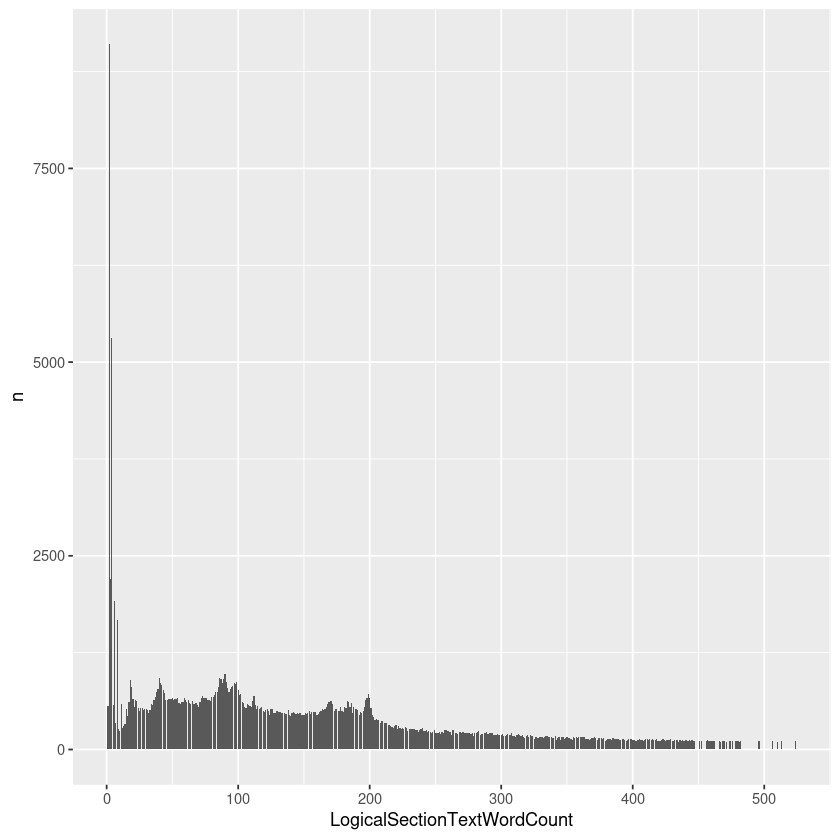

In [25]:
# quick check on the distribution of number of words in sections
dat %>% 
    group_by(LogicalSectionTextWordCount) %>% 
    count() %>% 
    filter(n > 100) %>%
    ggplot(aes(x = LogicalSectionTextWordCount, y = n)) + geom_col()

dat %>% 
    group_by(LogicalSectionTextWordCount) %>% 
    count(sort = T) %>% 
    head(20)

* Filter number of words in section: more than 5 words

In [29]:
dat_lim <- dat %>% 
    filter(LogicalSectionTextWordCount > 4)

nrow(dat_lim)

[1] 223330

In [27]:
test <- dat_lim %>% sample_n(10)

start_time <- Sys.time()
test_langs <- test %>% select(section_id, year, text) %>% 
    mutate(lang = sapply(text, textcat))
end_time <- Sys.time()
time_taken <- round(end_time - start_time,2)
time_taken

Time difference of 0.2 secs

In [28]:
head(test_langs)

section_id                year
1 livzeitung18740603.2.3.9  1874
2 livzeitung18931029.2.17   1893
3 livzeitung19010321.2.3    1901
4 livzeitung18570731.2.10.5 1857
5 livzeitung18860404.2.2.2  1886
6 ekmteataja18610511.2.8.13 1861
  text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [ ]:
# create labels for the whole dataset

start_time <- Sys.time()
test_langs <- dat_lim %>% select(section_id, year, text)
test_langs <- test_langs %>% mutate(lang = sapply(text, textcat))
end_time <- Sys.time()
time_taken <- round(end_time - start_time,2)
time_taken

# save
langs_save <- test_langs %>% select(section_id, lang)
write.csv(file = "data/prerevol_sections_lang.csv", langs_save)